In [1]:
%matplotlib inline

In [3]:
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping 
import numpy as np
import matplotlib.pyplot as plt

# Create the model

In [6]:
def make_model(): # create multiple identical models for comparison purposes
    model = Sequential()
    model.add(Dense(20,))
    for hidden_layers in range(4):
        model.add(Dense(80,))
        model.add(LeakyReLU(0.01))
    model.add(Dense(20,))

    opt = Adam(lr=1e-5)
    model.compile(optimizer=opt, loss='mean_squared_error', metrics=['mae', 'mse'])
    return model


ham = make_model()
ddm = make_model()


# Read the training data
X  = np.load('train/X.npy')
Y  = np.load('train/Y.npy')
Z  = np.load('train/Z.npy')
Xv = np.load('validation/X.npy')
Yv = np.load('validation/Y.npy')
Zv = np.load('validation/Z.npy')

In [ ]:
# don't predict boundary conditions
Y  =  Y[:,1:-1]
Yv = Yv[:,1:-1]

# fixup the ddm method so it predicts T_{n+1} from T_{n}, but don't map from the end of one
# time  series to the start of the next one (with different alpha value)
Xddm = X
Yddm = X
Yddm = Yddm[:,1:-1] # drop boundary conditions
Xddm = np.delete(Xddm, np.arange(5000, 5001*16, 5001), axis=0) # drop the endpoint of time series
Yddm = np.delete(Yddm, np.arange(   0, 5001*16, 5001), axis=0) # drop the startpoint of time series

# repeat for validation data to be used in ddm
Xddm_v = Xv
Yddm_v = Xv
Yddm_v = Yddm_v[:,1:-1] # drop boundary conditions
Xddm_v = np.delete(Xddm_v, np.arange(5000, 5001*16, 5001), axis=0) # drop the endpoint of time series
Yddm_v = np.delete(Yddm_v, np.arange(   0, 5001*16, 5001), axis=0) # drop the startpoint of time series


In [7]:
print(X.shape)
print(Xv.shape)
print(Y.shape)
print(Xddm.shape)
print(Yddm.shape)

(80000, 20)
(10000, 20)
(80000, 20)


NameError: name 'Xddm' is not defined

# Train the model

In [8]:
early_stopping_monitor = EarlyStopping(patience=20) 
history_ham = ham.fit(X,Y, 
                      batch_size=32,
                      epochs=100,
                      validation_data=(Xv,Yv),
                      callbacks=[early_stopping_monitor])

Train on 80000 samples, validate on 10000 samples
Epoch 1/100
80000/80000 [==============================] - 4s 50us/step - loss: 0.0178 - mean_absolute_error: 0.0575 - mean_squared_error: 0.0178 - val_loss: 1.1650e-04 - val_mean_absolute_error: 0.0086 - val_mean_squared_error: 1.1650e-04
Epoch 2/100
80000/80000 [==============================] - 4s 47us/step - loss: 3.9269e-04 - mean_absolute_error: 0.0155 - mean_squared_error: 3.9269e-04 - val_loss: 5.0947e-05 - val_mean_absolute_error: 0.0053 - val_mean_squared_error: 5.0947e-05
Epoch 3/100
80000/80000 [==============================] - 4s 48us/step - loss: 8.5891e-05 - mean_absolute_error: 0.0065 - mean_squared_error: 8.5891e-05 - val_loss: 1.1341e-05 - val_mean_absolute_error: 0.0025 - val_mean_squared_error: 1.1341e-05
Epoch 4/100
80000/80000 [==============================] - 4s 46us/step - loss: 1.1600e-05 - mean_absolute_error: 0.0019 - mean_squared_error: 1.1600e-05 - val_loss: 1.9293e-06 - val_mean_absolute_error: 7.3806e-04

Epoch 33/100
80000/80000 [==============================] - 4s 45us/step - loss: 3.5951e-08 - mean_absolute_error: 7.8135e-05 - mean_squared_error: 3.5951e-08 - val_loss: 2.6749e-08 - val_mean_absolute_error: 5.2876e-05 - val_mean_squared_error: 2.6749e-08
Epoch 34/100
80000/80000 [==============================] - 3s 43us/step - loss: 3.5377e-08 - mean_absolute_error: 8.0999e-05 - mean_squared_error: 3.5377e-08 - val_loss: 2.4501e-08 - val_mean_absolute_error: 5.9402e-05 - val_mean_squared_error: 2.4501e-08
Epoch 35/100
80000/80000 [==============================] - 3s 42us/step - loss: 3.1075e-08 - mean_absolute_error: 7.6752e-05 - mean_squared_error: 3.1075e-08 - val_loss: 1.0614e-07 - val_mean_absolute_error: 2.4133e-04 - val_mean_squared_error: 1.0614e-07
Epoch 36/100
80000/80000 [==============================] - 3s 43us/step - loss: 3.3327e-08 - mean_absolute_error: 8.0710e-05 - mean_squared_error: 3.3327e-08 - val_loss: 2.2563e-08 - val_mean_absolute_error: 4.6531e-05 - val_mea

Epoch 65/100
80000/80000 [==============================] - 4s 46us/step - loss: 1.8026e-08 - mean_absolute_error: 6.0865e-05 - mean_squared_error: 1.8026e-08 - val_loss: 1.1787e-08 - val_mean_absolute_error: 4.3473e-05 - val_mean_squared_error: 1.1787e-08
Epoch 66/100
80000/80000 [==============================] - 3s 43us/step - loss: 1.9474e-08 - mean_absolute_error: 6.6182e-05 - mean_squared_error: 1.9474e-08 - val_loss: 2.7504e-08 - val_mean_absolute_error: 1.2416e-04 - val_mean_squared_error: 2.7504e-08
Epoch 67/100
80000/80000 [==============================] - 3s 43us/step - loss: 2.4718e-08 - mean_absolute_error: 6.7934e-05 - mean_squared_error: 2.4718e-08 - val_loss: 1.0957e-08 - val_mean_absolute_error: 3.3792e-05 - val_mean_squared_error: 1.0957e-08
Epoch 68/100
80000/80000 [==============================] - 3s 43us/step - loss: 1.7954e-08 - mean_absolute_error: 6.1359e-05 - mean_squared_error: 1.7954e-08 - val_loss: 1.8442e-08 - val_mean_absolute_error: 9.3957e-05 - val_mea

Epoch 97/100
80000/80000 [==============================] - 3s 42us/step - loss: 1.4842e-08 - mean_absolute_error: 6.5180e-05 - mean_squared_error: 1.4842e-08 - val_loss: 1.7642e-08 - val_mean_absolute_error: 9.4257e-05 - val_mean_squared_error: 1.7642e-08
Epoch 98/100
80000/80000 [==============================] - 3s 42us/step - loss: 1.5796e-08 - mean_absolute_error: 6.3417e-05 - mean_squared_error: 1.5796e-08 - val_loss: 7.9737e-09 - val_mean_absolute_error: 3.9474e-05 - val_mean_squared_error: 7.9737e-09
Epoch 99/100
80000/80000 [==============================] - 3s 42us/step - loss: 1.9258e-08 - mean_absolute_error: 6.2462e-05 - mean_squared_error: 1.9258e-08 - val_loss: 7.3669e-09 - val_mean_absolute_error: 2.7845e-05 - val_mean_squared_error: 7.3669e-09
Epoch 100/100
80000/80000 [==============================] - 3s 42us/step - loss: 1.4543e-08 - mean_absolute_error: 5.0480e-05 - mean_squared_error: 1.4543e-08 - val_loss: 8.2976e-09 - val_mean_absolute_error: 4.2127e-05 - val_me

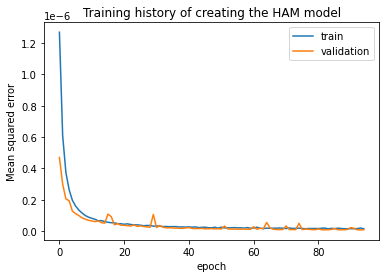

In [9]:
plt.plot(history_ham.history['mean_squared_error'][5:])
plt.plot(history_ham.history['val_mean_squared_error'][5:])
plt.legend(['train', 'validation'])
plt.xlabel('epoch')
plt.ylabel('Mean squared error')
plt.title('Training history of creating the HAM model')
plt.show()

In [10]:
early_stopping_monitor = EarlyStopping(patience=20) 
history_ddm = ddm.fit(X, Z,
                      batch_size=32,
                      epochs=100,
                      validation_data=(Xv,Zv),
                      callbacks=[early_stopping_monitor])

Train on 80000 samples, validate on 10000 samples
Epoch 1/100
80000/80000 [==============================] - 4s 48us/step - loss: 2.2059 - mean_absolute_error: 0.8679 - mean_squared_error: 2.2059 - val_loss: 0.0079 - val_mean_absolute_error: 0.0677 - val_mean_squared_error: 0.0079
Epoch 2/100
80000/80000 [==============================] - 4s 45us/step - loss: 0.0158 - mean_absolute_error: 0.0920 - mean_squared_error: 0.0158 - val_loss: 0.0035 - val_mean_absolute_error: 0.0443 - val_mean_squared_error: 0.0035
Epoch 3/100
80000/80000 [==============================] - 4s 45us/step - loss: 0.0062 - mean_absolute_error: 0.0574 - mean_squared_error: 0.0062 - val_loss: 5.3498e-04 - val_mean_absolute_error: 0.0174 - val_mean_squared_error: 5.3498e-04
Epoch 4/100
80000/80000 [==============================] - 3s 44us/step - loss: 9.0110e-04 - mean_absolute_error: 0.0200 - mean_squared_error: 9.0110e-04 - val_loss: 9.2345e-05 - val_mean_absolute_error: 0.0064 - val_mean_squared_error: 9.2345e-0

80000/80000 [==============================] - 4s 46us/step - loss: 5.5712e-07 - mean_absolute_error: 3.1469e-04 - mean_squared_error: 5.5712e-07 - val_loss: 6.6839e-07 - val_mean_absolute_error: 5.0131e-04 - val_mean_squared_error: 6.6839e-07
Epoch 34/100
80000/80000 [==============================] - 4s 45us/step - loss: 5.3408e-07 - mean_absolute_error: 3.2338e-04 - mean_squared_error: 5.3408e-07 - val_loss: 4.2019e-07 - val_mean_absolute_error: 2.5295e-04 - val_mean_squared_error: 4.2019e-07
Epoch 35/100
80000/80000 [==============================] - 4s 44us/step - loss: 4.9575e-07 - mean_absolute_error: 3.0773e-04 - mean_squared_error: 4.9575e-07 - val_loss: 4.0448e-07 - val_mean_absolute_error: 2.4710e-04 - val_mean_squared_error: 4.0448e-07
Epoch 36/100
80000/80000 [==============================] - 4s 44us/step - loss: 4.7616e-07 - mean_absolute_error: 3.1224e-04 - mean_squared_error: 4.7616e-07 - val_loss: 4.1058e-07 - val_mean_absolute_error: 2.7772e-04 - val_mean_squared_err

Epoch 65/100
80000/80000 [==============================] - 4s 45us/step - loss: 2.2224e-07 - mean_absolute_error: 2.4001e-04 - mean_squared_error: 2.2224e-07 - val_loss: 1.7529e-07 - val_mean_absolute_error: 1.5742e-04 - val_mean_squared_error: 1.7529e-07
Epoch 66/100
80000/80000 [==============================] - 4s 45us/step - loss: 2.2768e-07 - mean_absolute_error: 2.4086e-04 - mean_squared_error: 2.2768e-07 - val_loss: 6.9684e-07 - val_mean_absolute_error: 7.4254e-04 - val_mean_squared_error: 6.9684e-07
Epoch 67/100
80000/80000 [==============================] - 4s 46us/step - loss: 2.2845e-07 - mean_absolute_error: 2.4662e-04 - mean_squared_error: 2.2845e-07 - val_loss: 1.6636e-07 - val_mean_absolute_error: 1.5654e-04 - val_mean_squared_error: 1.6636e-07
Epoch 68/100
80000/80000 [==============================] - 4s 45us/step - loss: 2.0639e-07 - mean_absolute_error: 2.3180e-04 - mean_squared_error: 2.0639e-07 - val_loss: 1.7405e-07 - val_mean_absolute_error: 1.7975e-04 - val_mea

Epoch 97/100
80000/80000 [==============================] - 4s 44us/step - loss: 1.5845e-07 - mean_absolute_error: 2.0977e-04 - mean_squared_error: 1.5845e-07 - val_loss: 1.7245e-07 - val_mean_absolute_error: 2.8715e-04 - val_mean_squared_error: 1.7245e-07
Epoch 98/100
80000/80000 [==============================] - 4s 44us/step - loss: 1.4938e-07 - mean_absolute_error: 2.1633e-04 - mean_squared_error: 1.4938e-07 - val_loss: 1.0535e-07 - val_mean_absolute_error: 1.2611e-04 - val_mean_squared_error: 1.0535e-07
Epoch 99/100
80000/80000 [==============================] - 4s 45us/step - loss: 1.5822e-07 - mean_absolute_error: 2.0881e-04 - mean_squared_error: 1.5822e-07 - val_loss: 1.2136e-07 - val_mean_absolute_error: 1.9691e-04 - val_mean_squared_error: 1.2136e-07
Epoch 100/100
80000/80000 [==============================] - 4s 44us/step - loss: 1.6244e-07 - mean_absolute_error: 2.0620e-04 - mean_squared_error: 1.6244e-07 - val_loss: 1.0819e-07 - val_mean_absolute_error: 1.2666e-04 - val_me

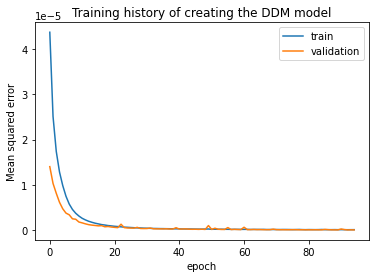

In [11]:
plt.plot(history_ddm.history['mean_squared_error'][5:])
plt.plot(history_ddm.history['val_mean_squared_error'][5:])
plt.legend(['train', 'validation'])
plt.xlabel('epoch')
plt.ylabel('Mean squared error')
plt.title('Training history of creating the DDM model')
plt.show()

In [13]:
print(ham.summary())
ham.save('ham.h5')
ddm.save('ddm.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_6 (Dense)              (None, 80)                1680      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 80)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 80)                6480      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 80)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 80)                6480      
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 80)                0         
__________

# Verify against test cases

In [14]:
import IFEM_CoSTA
import splipy as sp
from keras.models import load_model
from os import listdir
from tqdm import tqdm

In [ ]:
ham = load_model('ham.h5')
ddm = load_model('ddm.h5')

In [15]:
spline = sp.Curve()
# spline.raise_order(1)
# spline.refine(17) # for a grand total of 20 controlpoints with p=2
spline.refine(18) # for a grand total of 20 controlpoints with p=1
spline = spline.set_dimension(1)

100%|██████████| 5000/5000 [00:18<00:00, 270.65it/s]


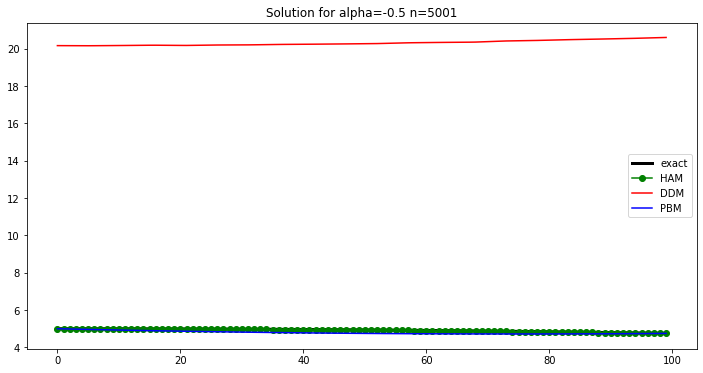

100%|██████████| 5000/5000 [00:18<00:00, 266.41it/s]


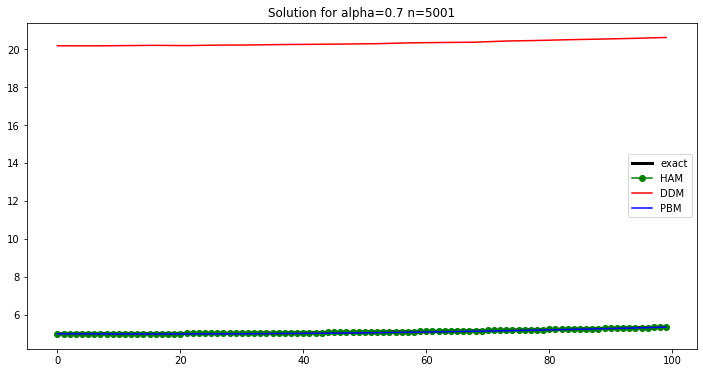

  3%|▎         | 128/5000 [00:00<00:19, 249.61it/s]


KeyboardInterrupt: 

In [17]:
alphas = [-.5, .7, 1.5, 2.5  ]
for alpha in alphas:
# for myfile in listdir('test'):
    # if myfile[0] != 'X': continue
    # alpha = int(myfile[3:-4])/10
    
    # X  = np.load(f'test/{myfile}')

    pbm   = IFEM_CoSTA.HeatEquation('pbm.xinp')
    exact = IFEM_CoSTA.HeatEquation('P1.xinp')
    mu    = {'dt':0.001, 't':0.0, 'ALPHA':alpha}
    u_pbm_prev = pbm.initial_condition(mu)
    u_ddm_prev = pbm.initial_condition(mu)
    u_ham_prev = pbm.initial_condition(mu)
    u_exact_prev = exact.initial_condition(mu)
    sigma = [0.0]*pbm.ndof
    zeros = [0.0]*pbm.ndof
    
    # reshape data to fit into tensorflow
    u_ddm_prev = np.array(u_ddm_prev, ndmin=2)
                                                                               
    # run time iterations
    for n in tqdm(range(5000)):
        # update values
        mu['t'] += mu['dt']
        
        # fetch the boundary conditions
        ud = pbm.initial_condition(mu)
        
        # create a predictor step for ham
        u_ham_pred = pbm.predict(mu, u_ham_prev)

        # create a correction term for ham
        sigma = ham.predict(np.array(u_ham_pred, ndmin=2)).flatten()
                                          
        # update the next step with a corrector
        u_exact_prev     = exact.anasol(mu)['primary']
        u_pbm_prev       = pbm.correct(mu, u_pbm_prev, zeros)
        u_ham_prev       = pbm.correct(mu, u_ham_prev, sigma)
        u_ddm_prev       = ddm.predict(u_ddm_prev)
        # u_ddm_prev[0,0]  = ud[0]
        # u_ddm_prev[0,-1] = ud[-1]

        
    plt.figure(figsize=(12,6))
    
    x = np.linspace(0,1,100)
    N = spline.bases[0](x)
    plt.plot((N@u_exact_prev).T, 'k-', linewidth=3)
    plt.plot((N@u_ham_prev).T, 'go-')
    plt.plot((N@u_ddm_prev.flatten()).T, 'r-')
    plt.plot((N@u_pbm_prev).T, 'b-')
    plt.legend(['exact', 'HAM', 'DDM', 'PBM'])
    # plt.legend(['PBM', 'HAM', 'exact'])
    plt.title(f'Solution for alpha={alpha} n=5001')
    plt.show()
